In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('E:\\DATA SCIENCE\\all csv files\\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
df.drop(['CustomerID'],axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [8]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:>

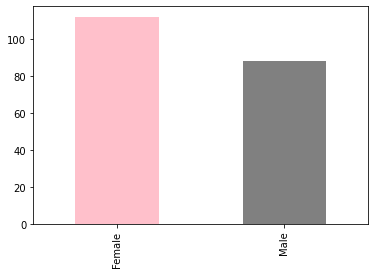

In [9]:
df['Gender'].value_counts().plot(kind='bar',color=['pink','grey'])

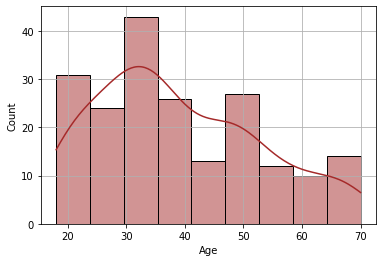

In [10]:
sns.histplot(df.Age,color='brown',kde=True)
plt.grid()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

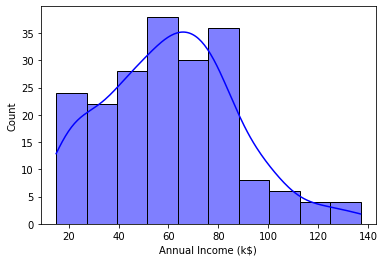

In [12]:
sns.histplot(df['Annual Income (k$)'],color='blue',kde=True)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

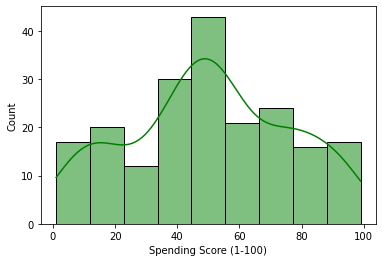

In [13]:
sns.histplot(df['Spending Score (1-100)'],color='green',kde=True)

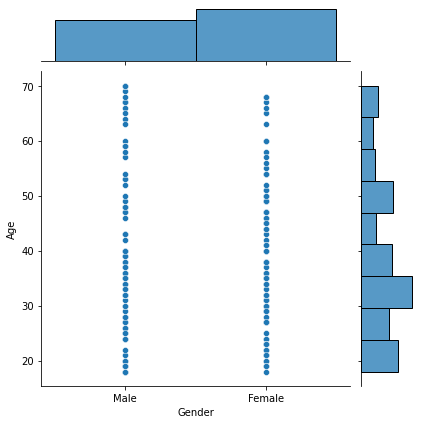

In [15]:
sns.jointplot(x='Gender',y='Age',data=df)

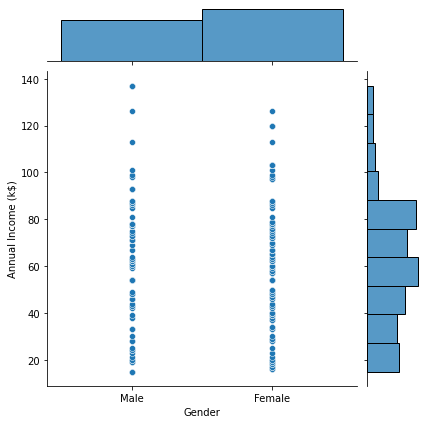

In [16]:
sns.jointplot(x='Gender',y='Annual Income (k$)',data=df)

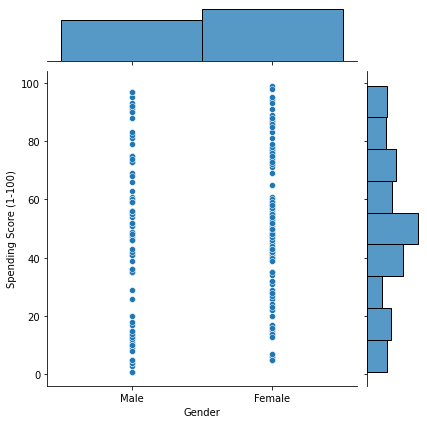

In [13]:
sns.jointplot(x='Gender',y='Spending Score (1-100)',data=df)

# Label Encoding...
becose we have one categorical parameter as Gender column.

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
dfnew=df
dfnew.Gender=le.fit_transform(dfnew['Gender'])
dfnew

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# Standardizing Variables...
lets standardize all varible so that could get better result.

In [6]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
col_names=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
feature=dfnew[col_names]
scaled_features=scale.fit_transform(feature)
scaled_df=pd.DataFrame(scaled_features,columns=col_names)
scaled_df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [7]:
new_df=scaled_df.join(dfnew.Gender)
new_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [8]:
new_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'], dtype='object')

# Elbow Plot
To know the value of K = ?

In [10]:
from sklearn.cluster import KMeans
SSE=[]
k_range=range(1,10)
for k in k_range:
    km_cluster=KMeans(n_clusters=k)
    km_cluster.fit(new_df)
    SSE.append(km_cluster.inertia_)

In [11]:
SSE

[649.2800000000002,
 438.5224115567773,
 344.6607914757499,
 254.28290726083466,
 216.78490151651047,
 181.9514362434146,
 165.07877312554004,
 150.97578180307872,
 140.41319004326053]

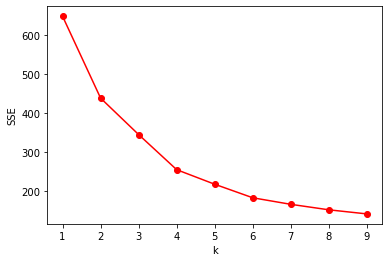

In [12]:
plt.plot(k_range,SSE,'-o',color='red')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

Here we can see clearly that our Elbow inclined in 4 that implies our K = 4.

# Silhouette_score
A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

The silhouette score measures the distance between all the data points within the same cluster. The lower this distance, silhoutette_score is better.

It also measures the distance between an object and the data points in the nearest cluster. The higher this distance, the better.

A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.

Lets calculate the silhouette score of the model we just built:

In [13]:
from sklearn.metrics import silhouette_score
kmeans=KMeans(n_clusters = 4)
kmeans.fit(new_df)
silhouette_score(new_df,kmeans.labels_)*100

35.02702043465398

The silhouette score of this model is about 0.35.

This isn't a bad model, but we can do better and try getting higher cluster separation.

Before we try doing that, lets visualize the clusters we just built to get an idea of how well the model is doing.

In [14]:
km_cluster=KMeans(n_clusters=4)
clusters=km_cluster.fit_predict(new_df.iloc[:,0:])
clusters

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 3, 3, 0, 3, 0, 3, 2, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [15]:
new_df['Clusters']=clusters
new_df

,Age,Annual Income (k$),Spending Score (1-100),Gender,Clusters
0,-1.424569,-1.738999,-0.434801,1,1
1,-1.281035,-1.738999,1.195704,1,1
2,-1.352802,-1.700830,-1.715913,0,1
3,-1.137502,-1.700830,1.040418,0,1
4,-0.563369,-1.662660,-0.395980,0,1
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,3
196,0.441365,2.497807,-0.861839,0,0
197,-0.491602,2.497807,0.923953,1,3
198,-0.491602,2.917671,-1.250054,1,0


In [16]:
km_cluster.cluster_centers_

array([[ 0.03720536,  0.99011499, -1.18875705,  0.5       ],
       [-0.96249203, -0.78476346,  0.39202966,  0.40350877],
       [ 1.08616125, -0.49056525, -0.39717443,  0.43076923],
       [-0.42880597,  0.97484722,  1.21608539,  0.45      ]])

In [17]:
new_df['Clusters'].value_counts()

2    65
1    57
3    40
0    38
Name: Clusters, dtype: int64

In [18]:
new_df['Clusters'].value_counts().values

array([65, 57, 40, 38], dtype=int64)

<BarContainer object of 4 artists>

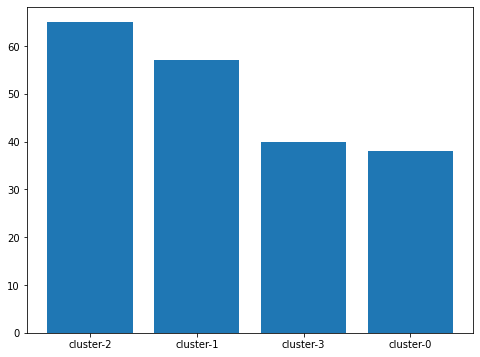

In [19]:
plt.figure(figsize=(8,6))
plt.bar(list(('cluster-2','cluster-1','cluster-3','cluster-0')),list((new_df['Clusters'].value_counts().values)))

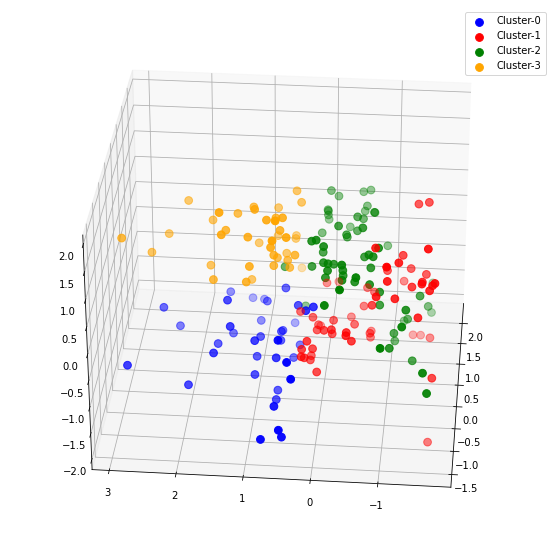

In [20]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(new_df.Age[new_df.Clusters == 0], new_df["Annual Income (k$)"][new_df.Clusters == 0], new_df["Spending Score (1-100)"][new_df.Clusters == 0], c='blue',s=60,label='Cluster-0')
ax.scatter(new_df.Age[new_df.Clusters == 1], new_df["Annual Income (k$)"][new_df.Clusters == 1], new_df["Spending Score (1-100)"][new_df.Clusters == 1], c='red', s=60,label='Cluster-1')
ax.scatter(new_df.Age[new_df.Clusters == 2], new_df["Annual Income (k$)"][new_df.Clusters == 2], new_df["Spending Score (1-100)"][new_df.Clusters == 2], c='green', s=60,label='Cluster-2')
ax.scatter(new_df.Age[new_df.Clusters == 3], new_df["Annual Income (k$)"][new_df.Clusters == 3], new_df["Spending Score (1-100)"][new_df.Clusters == 3], c='orange', s=60,label='Cluster-3')
ax.view_init(30, 185)
ax.legend()
plt.show()

From the above diagram, we can see that cluster separation isn't too great.

This, along with the silhouette score shows us that the model isn't performing too well.

Now, lets create a new model that has better cluster separability than this one.

# Building clustering model-2
For this model, lets do some feature selection.

We can use a technique called Principal Component Analysis (PCA).

PCA is a technique that helps us reduce the dimension of a dataset. When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model.

We can select a subset of these variables and include them into the K-means model.

Now, lets run PCA on the dataset:

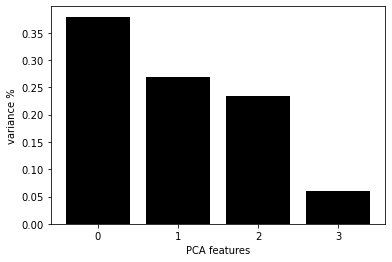

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principalcomponents=pca.fit_transform(new_df)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [22]:
pca_df=pd.DataFrame(principalcomponents)
pca_df

,0,1,2,3
0,0.499851,-1.479578,-1.599339,0.587670
1,-0.651538,-1.630384,-1.697164,-0.560133
2,1.415594,-1.228528,-1.530806,1.491998
3,-0.536232,-1.507413,-1.694928,-0.436526
4,0.614957,-0.758988,-1.602765,0.270881
...,...,...,...,...
195,-1.972538,0.319091,2.133207,0.226039
196,1.562884,-0.048803,2.561146,-0.577573
197,-1.865102,0.205274,2.419882,0.358212
198,1.656945,-0.749300,3.081546,-0.011770


In [23]:
pca_df.shape

(200, 4)

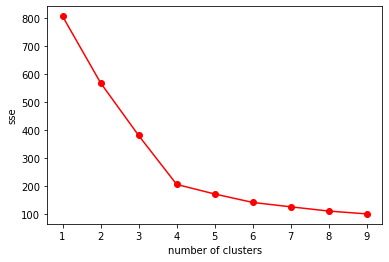

In [24]:
ks = range(1, 10)
sse = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df.iloc[:,0:])
    sse.append(model.inertia_)

plt.plot(ks, sse,'-o',color='red')
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.show()

In [26]:
model = KMeans(n_clusters=4)
model.fit(pca_df.iloc[:,0:])

# silhouette score
silhouette_score(pca_df.iloc[:,0:], model.labels_, metric='euclidean')*100

51.926532830940495

The silhouette score of this model is 52%, which is better than the previous model.

In [23]:
model.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 3, 1, 1, 1, 0, 0, 0, 0, 1, 3, 2, 2, 3, 2, 3, 2, 0, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [27]:
model = KMeans(n_clusters=4)
clusters = model.fit_predict(pca_df.iloc[:,0:])
new_df["new_Clusters"] = clusters
newdf=pd.DataFrame(new_df)
newdf

,Age,Annual Income (k$),Spending Score (1-100),Gender,Clusters,new_Clusters
0,-1.424569,-1.738999,-0.434801,1,1,1
1,-1.281035,-1.738999,1.195704,1,1,1
2,-1.352802,-1.700830,-1.715913,0,1,1
3,-1.137502,-1.700830,1.040418,0,1,1
4,-0.563369,-1.662660,-0.395980,0,1,1
...,...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0,3,2
196,0.441365,2.497807,-0.861839,0,0,3
197,-0.491602,2.497807,0.923953,1,3,2
198,-0.491602,2.917671,-1.250054,1,0,3


In [28]:
newdf['new_Clusters'].value_counts()

0    65
1    57
2    40
3    38
Name: new_Clusters, dtype: int64

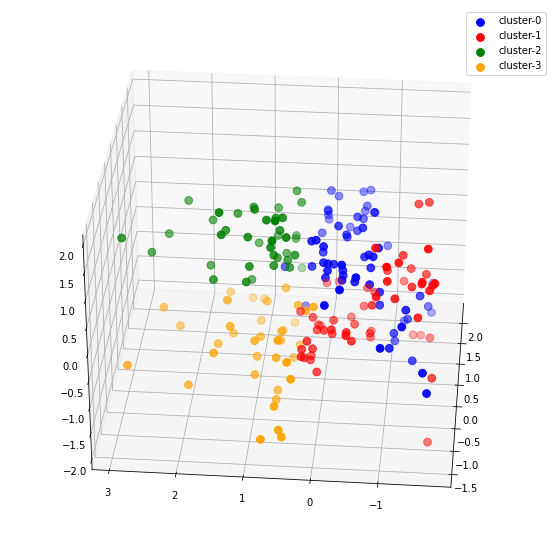

In [29]:
#We can visualize the clusters for this model just like we did earlier:
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.new_Clusters == 0], newdf["Annual Income (k$)"][newdf.new_Clusters == 0], newdf["Spending Score (1-100)"][newdf.new_Clusters == 0],c='blue',s=60,label='cluster-0')
ax.scatter(newdf.Age[newdf.new_Clusters == 1], newdf["Annual Income (k$)"][newdf.new_Clusters == 1], newdf["Spending Score (1-100)"][newdf.new_Clusters == 1],c='red',s=60,label='cluster-1')
ax.scatter(newdf.Age[newdf.new_Clusters == 2], newdf["Annual Income (k$)"][newdf.new_Clusters == 2], newdf["Spending Score (1-100)"][newdf.new_Clusters == 2],c='green',s=60,label='cluster-2')
ax.scatter(newdf.Age[newdf.new_Clusters == 3], newdf["Annual Income (k$)"][newdf.new_Clusters == 3], newdf["Spending Score (1-100)"][newdf.new_Clusters == 3],c='orange',s=60,label='cluster-3')
ax.view_init(30, 185)
plt.legend()
plt.show()

Notice that the clusters in the second model are much better separated than that in the first model.

Furthermore, the silhouette score of the second model is a lot higher.

For these reasons, we can pick the second model to go forward with our analysis.

# Cluster Analysis
Now that we're done building these different clusters, lets try to interpret them and look at the different customer segments.
First, lets map the clusters back to the dataset and take a look at the head of the data frame.

In [34]:
# map back clusters to dataframe
pred = model.predict(pca_df.iloc[:,0:])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,3
197,Male,32,126,74,2
198,Male,32,137,18,3


Notice that each row in the data frame is now assigned to a cluster.

To compare attributes of the different clusters, lets find the average of all variables across each cluster:

In [35]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,53.984615,47.707692,39.969231
1,1,25.438596,40.000000,60.298246
2,2,32.875000,86.100000,81.525000
3,3,39.368421,86.500000,19.578947


We can interpret these clusters more easily if we visualized them. 

Run these four lines of code to come up with different visualizations of each variable:

<AxesSubplot:xlabel='cluster', ylabel='Age'>

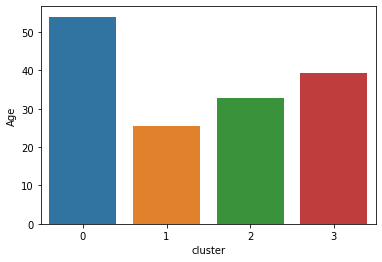

In [36]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

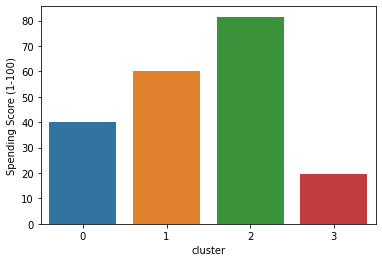

In [37]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

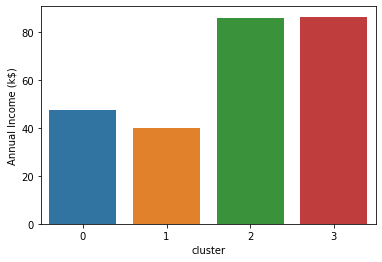

In [38]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

# Gender Breakdown

In [42]:
df1 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df1
# second Gender show the no of male/female

Gender
cluster Gender        
0       Female      37
        Male        28
1       Female      34
        Male        23
2       Female      22
        Male        18
3       Female      19
        Male        19

# Main Attributes of segments...

Cluster-0 :

1.Low mid avg income, lower spending.

2.Mean age is around 50 yr, Gender is predominantly female.

Cluster-1 :

1.Low avg income, moderate spending.

2.Mean age is 25 yr, Gender is predominantly female.

Cluster-2 :

1.High income and high spending.

2.Mean age is around 30 yr, Gender is mainly female but male can be considered.

Cluster-3 :

1.Income is high but lowest spending.

2.Avg age is around 40 yr, Gender is male and female both.

# Let's build the consumer persona based on cluster created.

Cluster-0: Closer to Retirement

This segment comprises of an older group of people.

They earn less and spend less, and are probably saving up for retirement.

Recommendation: Marketing to these individuals can be done through Facebook, which appeals to an older demographic. Promote healthcare related products to people in this segment.

Cluster-1: Careless Buyers

This segment is made up of a younger age group.

Individuals in this segment are most likely first jobbers. They make the least amount of money compared to all other segments.

However, they are very high spenders.

These are enthusiastic young individuals who enjoy living a good lifestyle, and tend to spend above their means.

Recommendation: Since these are young individuals who spend a lot, providing them with travel coupons or hotel discounts might be a good idea. Providing them with discounts off top clothing and makeup brands would also work well for this segment.

Cluster-2: Highly affluent individuals

This segment is made up of middle-aged individuals.

These are individuals who have worked hard to build up a significant amount of wealth.

They also spend large amounts of money to live a good lifestyle.

These individuals have likely just started a family, and are leading baby or family-focused lifestyles. It is a good idea to promote baby or child related products to these individuals.

Recommendation: Due to their large spending capacity and their demographic, these individuals are likely to be looking for properties to buy or invest in. They are also more likely than all other segments to take out housing loans and make serious financial commitments.

Cluster-3: The frugal spender

This persona comprises of middle aged individuals who are very careful with money.

Despite having the highest average income compared to individuals in all other clusters, they spend the least.

This might be because they have financial responsibilities - like saving up for their kid's higher education.

Recommendation: Promos, coupons, and discount codes will attract individuals in this segment due to their tendency to spend less.